In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandasql as pdsql
pysql = lambda q: pdsql.sqldf(q, globals())

In [17]:
url2='generated/user_tendency.csv'
tendy = pd.read_csv(url2)
#select users who have participated in the calls bothways
query1="SELECT TENDENCY FROM tendy where TENDENCY NOT IN(0,1);"
tendencies=pysql(query1)

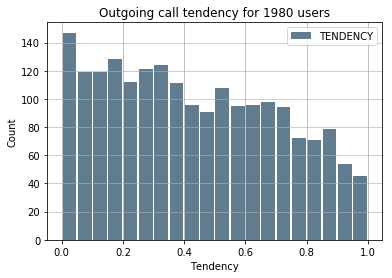

In [18]:
# Generate histogram for user tendencies
tendencies.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Outgoing call tendency for '+ str(len(tendencies))+' users')
plt.xlabel('Tendency')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

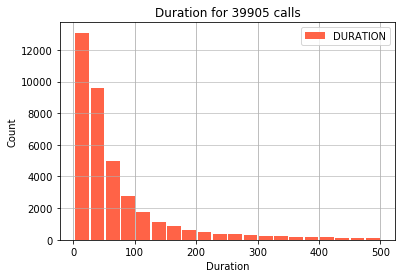

In [49]:
contributors=pd.read_csv('generated/call_log.csv')
query2="SELECT DURATION from contributors where RECORD_TYPE=\"VOICE\" AND DURATION >1;"
duration=pysql(query2)
duration.plot.hist(grid=True,range=[2,500], bins=20, rwidth=0.9,color='#FF6347')
plt.title('Duration for '+ str(len(duration))+' calls')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [78]:
raw_features=pd.read_csv('train/trustdb.csv')
raw_features=raw_features.drop(['CALLING_NO','CALLED_NO'],axis=1)


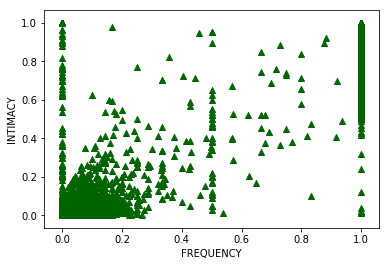

In [79]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter(raw_features['FREQUENCY'], raw_features['INTIMACY'], color='darkgreen', marker='^')
ax.set_xlabel('FREQUENCY')
ax.set_ylabel('INTIMACY')
plt.show()

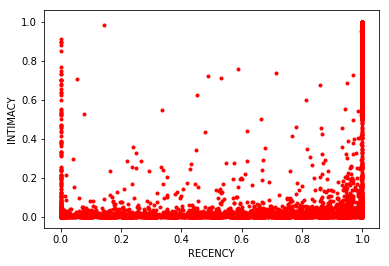

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(raw_features['RECENCY'], raw_features['INTIMACY'], color='red', marker='.')
ax.set_xlabel('RECENCY')
ax.set_ylabel('INTIMACY')
plt.show()

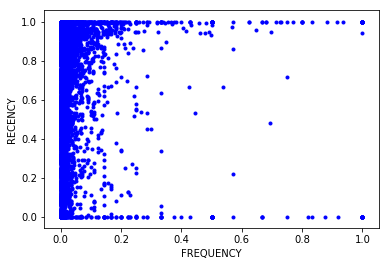

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(raw_features['FREQUENCY'], raw_features['RECENCY'], color='blue', marker='.')
ax.set_xlabel('FREQUENCY')
ax.set_ylabel('RECENCY')
plt.show()